# Notebook 2: All Parks
Now that we established our method for MacArthur Park, the next step was to apply this process to 12 parks across LA we selected based on a quick Flickr search to determine if there were a variety of photos with a variety of topics. 

This notebook is broken into three sections:
1. Connect to the Flickr API
2. Data Wrangling
3. Visualizing Cultural Ecosystem Services

## Connect to the Flickr API

In [1]:
#The first step was to once again call the API function

import flickrapi
import json

api_key = u'f950122b83b682c546201f10d33edffe'
api_secret = u'057c65cd7fe1b2c8'

#flickr = flickrapi.FlickrAPI(api_key, api_secret)
#for json format
flickr = flickrapi.FlickrAPI(api_key, api_secret, format='parsed-json')

This time we wanted to pull data from all 12 pre-selected parks. Here, we searched by tags identifying each park, then saved into a dataframe 

## Data Wrangling

In [2]:
import pandas as pd

def get_parks(num_pages):
    park_list = []
    for i in range(1, num_pages+1): #range documentation starts at 0, +1 ensures we pull the page number we feed the function below
        extras = 'geo,description,tags'
        tags = ['MacArthur Park, Woodley Avenue Park, Rio de Los Angeles State Park, Runyon Canyon, Temescal Gateway, Heidelberg Park, Hancock Park, Franklin Canyon Park, Angels Gate, Coldwater Canyon, Chatsworth Park South, Cheviot Hills, O''Melveny Park']
        parks_LA = flickr.photos.search(tags=tags, bbox = '-118.898278,33.704902,-118.161021,34.32848',
                                        method_name='flickr', page=i, per_page=500, extras=extras)  
        
        #.extend combines each page of search results together: https://www.programiz.com/python-programming/methods/list/extend
        park_list.extend(parks_LA['photos']['photo']) #pulls data from each individual photo 
        
    #reorients the data and converts to pandas df: https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe
    df = pd.DataFrame.from_dict(park_list, orient='columns') 
    
    return df

parks_data = get_parks(12) #pulls data from all 12 pages of photos

In [3]:
#checking the dataframe 
parks_data

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,description,...,latitude,longitude,accuracy,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family
0,49856813066,9771767@N04,83838b7d7b,65535,66,Angel's Gate Park,1,0,0,"{'_content': 'Have a wonderful day, everyone...'}",...,33.709932,-118.293882,16,0,,5392528,1,0,0,0
1,51050150612,192454804@N08,d07257b1b3,65535,66,English Home,1,0,0,{'_content': 'English style house in Los Angel...,...,34.074580,-118.334275,16,0,,5355165,1,0,0,0
2,50952829406,77318907@N08,6fe5b8ef3a,65535,66,Angel's Gate Cloudscape,1,0,0,"{'_content': 'San Pedro, CA 01-02-21'}",...,33.721867,-118.271759,16,0,,5392528,1,0,0,0
3,50952896937,77318907@N08,ebe224b984,65535,66,Harbor Entrance at Sunrise,1,0,0,"{'_content': 'The Angel's Gate in San Pedro, C...",...,33.721707,-118.271791,16,0,,5392528,1,0,0,0
4,50474879407,54718757@N00,a011599de5,65535,66,"22,834",1,0,0,"{'_content': '22,834 smoke on the water, in th...",...,33.732833,-118.317989,16,0,,5392544,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,280833391,67833269@N00,b14241e30a,102,1,Jon Nakamura 10-27-06,1,0,0,{'_content': 'Angels Gate Cultural Center Stud...,...,33.713961,-118.294783,16,0,.D8LiGdQUL_LN4aBcw,12587688,1,0,0,0
2746,279079416,63348143@N00,4b0eb50c34,103,1,cleavage,1,0,0,{'_content': ''},...,34.081597,-118.327217,16,0,efoucK5TWr0U1ThAlQ,28751566,1,0,0,0
2747,279078460,63348143@N00,a8a2f65a8e,90,1,cement,1,0,0,{'_content': ''},...,34.081597,-118.327217,16,0,efoucK5TWr0U1ThAlQ,28751566,1,0,0,0
2748,277276618,36521983488@N01,a7a3b3b36f,115,1,,1,0,0,{'_content': 'got a ton of pics to upload from...,...,34.108437,-118.213984,16,0,7Z5HMmpTVr4VzDpD,2442047,1,0,0,0


The next step was to create a new column and assign the park name to that column so that we could more easily track tags as they relate to specific parks.

In [4]:
# Create a new column and assign the park name 
park_names = ['macarthur', 'woodley', 'riodelosangeles', 'runyoncanyon', 'temescalgateway', 'heidelbergpark', 'hancockpark', 'franklincanyonpark', 'angelsgate', 'coldwatercanyon', 'chatsworthparksouth','cheviothills']

def get_park_name(row):
    for park in park_names:
        if park in row['tags']:
            return park
    return 'Unknown'

parks_data['parkname'] = parks_data.apply(lambda row: get_park_name(row), axis=1)

In [5]:
#checking our work
parks_data

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,description,...,longitude,accuracy,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family,parkname
0,49856813066,9771767@N04,83838b7d7b,65535,66,Angel's Gate Park,1,0,0,"{'_content': 'Have a wonderful day, everyone...'}",...,-118.293882,16,0,,5392528,1,0,0,0,angelsgate
1,51050150612,192454804@N08,d07257b1b3,65535,66,English Home,1,0,0,{'_content': 'English style house in Los Angel...,...,-118.334275,16,0,,5355165,1,0,0,0,hancockpark
2,50952829406,77318907@N08,6fe5b8ef3a,65535,66,Angel's Gate Cloudscape,1,0,0,"{'_content': 'San Pedro, CA 01-02-21'}",...,-118.271759,16,0,,5392528,1,0,0,0,angelsgate
3,50952896937,77318907@N08,ebe224b984,65535,66,Harbor Entrance at Sunrise,1,0,0,"{'_content': 'The Angel's Gate in San Pedro, C...",...,-118.271791,16,0,,5392528,1,0,0,0,angelsgate
4,50474879407,54718757@N00,a011599de5,65535,66,"22,834",1,0,0,"{'_content': '22,834 smoke on the water, in th...",...,-118.317989,16,0,,5392544,1,0,0,0,angelsgate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,280833391,67833269@N00,b14241e30a,102,1,Jon Nakamura 10-27-06,1,0,0,{'_content': 'Angels Gate Cultural Center Stud...,...,-118.294783,16,0,.D8LiGdQUL_LN4aBcw,12587688,1,0,0,0,angelsgate
2746,279079416,63348143@N00,4b0eb50c34,103,1,cleavage,1,0,0,{'_content': ''},...,-118.327217,16,0,efoucK5TWr0U1ThAlQ,28751566,1,0,0,0,hancockpark
2747,279078460,63348143@N00,a8a2f65a8e,90,1,cement,1,0,0,{'_content': ''},...,-118.327217,16,0,efoucK5TWr0U1ThAlQ,28751566,1,0,0,0,hancockpark
2748,277276618,36521983488@N01,a7a3b3b36f,115,1,,1,0,0,{'_content': 'got a ton of pics to upload from...,...,-118.213984,16,0,7Z5HMmpTVr4VzDpD,2442047,1,0,0,0,heidelbergpark


In [6]:
#save to a CSV file so we do not have to keep pulling from Flickr

parks_data.to_csv('parks_data.csv', index=False)  

Next we take a look at the tags to determine how best to clean them up. 

In [70]:
#importing parks csv
import pandas as pd

# You might need to add a path as well
fn = 'parks_data.csv'
parks_data = pd.read_csv(fn)
parks_data.head()

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,description,...,longitude,accuracy,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family,parkname
0,49856813066,9771767@N04,83838b7d7b,65535,66,Angel's Gate Park,1,0,0,"{'_content': 'Have a wonderful day, everyone...'}",...,-118.293882,16,0,NaN,5392528.0,1,0,0,0,angelsgate
1,51050150612,192454804@N08,d07257b1b3,65535,66,English Home,1,0,0,{'_content': 'English style house in Los Angel...,...,-118.334275,16,0,NaN,5355165.0,1,0,0,0,hancockpark
2,50952829406,77318907@N08,6fe5b8ef3a,65535,66,Angel's Gate Cloudscape,1,0,0,"{'_content': 'San Pedro, CA\n01-02-21'}",...,-118.271759,16,0,NaN,5392528.0,1,0,0,0,angelsgate
3,50952896937,77318907@N08,ebe224b984,65535,66,Harbor Entrance at Sunrise,1,0,0,"{'_content': ""The Angel's Gate in San Pedro, C...",...,-118.271791,16,0,NaN,5392528.0,1,0,0,0,angelsgate
4,50474879407,54718757@N00,a011599de5,65535,66,"22,834",1,0,0,"{'_content': '22,834 smoke on the water, in th...",...,-118.317989,16,0,NaN,5392544.0,1,0,0,0,angelsgate


In [71]:
#create function to remove stop words, tokenize, convert all text to lowercase, and convert string to list
#We also went back and created a list from our tags of common words we did not want to analyze (i.e. losangeles, la, california, etc)

import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
swords += ['losangeles', 'la', 'losangelesca', 'ca', 'dtla', 'macarthur', 'macarthurpark', 'woodley', 'riodelosangeles', 'runyoncanyon', 
           'temescalgateway', 'heidelbergpark', 'hancockpark', 'franklincanyonpark', 'franklincanyonpark', 'angelsgate', 
           'coldwatercanyon', 'chatsworthparksouth','cheviothills', 'california', 'usa', 'southerncalifornia', 'park', 'parklabrea', 
          'unitedstates', 'america','us']

def clean_string(text):
    # remove punctuation
    text = re.sub(r"[^A-z\s]", "", text)
    
    cleaned_list_of_words = [word for word in word_tokenize(text.lower()) if word not in swords] #return a string or apply to all tags
    
    return cleaned_list_of_words

#calling the function to only apply to the tags column 
parks_data['tags'] = parks_data['tags'].apply(clean_string)
parks_data

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,description,...,longitude,accuracy,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family,parkname
0,49856813066,9771767@N04,83838b7d7b,65535,66,Angel's Gate Park,1,0,0,"{'_content': 'Have a wonderful day, everyone...'}",...,-118.293882,16,0,NaN,5392528.0,1,0,0,0,angelsgate
1,51050150612,192454804@N08,d07257b1b3,65535,66,English Home,1,0,0,{'_content': 'English style house in Los Angel...,...,-118.334275,16,0,NaN,5355165.0,1,0,0,0,hancockpark
2,50952829406,77318907@N08,6fe5b8ef3a,65535,66,Angel's Gate Cloudscape,1,0,0,"{'_content': 'San Pedro, CA\n01-02-21'}",...,-118.271759,16,0,NaN,5392528.0,1,0,0,0,angelsgate
3,50952896937,77318907@N08,ebe224b984,65535,66,Harbor Entrance at Sunrise,1,0,0,"{'_content': ""The Angel's Gate in San Pedro, C...",...,-118.271791,16,0,NaN,5392528.0,1,0,0,0,angelsgate
4,50474879407,54718757@N00,a011599de5,65535,66,"22,834",1,0,0,"{'_content': '22,834 smoke on the water, in th...",...,-118.317989,16,0,NaN,5392544.0,1,0,0,0,angelsgate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,280833391,67833269@N00,b14241e30a,102,1,Jon Nakamura 10-27-06,1,0,0,{'_content': 'Angels Gate Cultural Center Stud...,...,-118.294783,16,0,.D8LiGdQUL_LN4aBcw,12587688.0,1,0,0,0,angelsgate
2746,279079416,63348143@N00,4b0eb50c34,103,1,cleavage,1,0,0,{'_content': ''},...,-118.327217,16,0,efoucK5TWr0U1ThAlQ,28751566.0,1,0,0,0,hancockpark
2747,279078460,63348143@N00,a8a2f65a8e,90,1,cement,1,0,0,{'_content': ''},...,-118.327217,16,0,efoucK5TWr0U1ThAlQ,28751566.0,1,0,0,0,hancockpark
2748,277276618,36521983488@N01,a7a3b3b36f,115,1,NaN,1,0,0,{'_content': 'got a ton of pics to upload from...,...,-118.213984,16,0,7Z5HMmpTVr4VzDpD,2442047.0,1,0,0,0,heidelbergpark


In [56]:
# Check to make sure tags are in a list
parks_data['tags']

0       [koreanfriendshipbell, korean, friendshipbell,...
1                             [englishhome, architecture]
2       [losangelesharbor, sanpedro, sunrise, colorful...
3                                      [sanpedro, harbor]
4       [jrglongbeach, smoke, water, harbor, hiking, s...
                              ...                        
2745    [jon, artist, studioartist, agcc, angelsgatecu...
2746    [camera, cars, corner, clinton, rudy, tiles, h...
2747    [morning, corner, truck, clinton, cement, holl...
2748    [auto, car, vw, volkswagen, automobile, conver...
2749    [intern, agcc, angelsgateculturalcenter, mindy...
Name: tags, Length: 2750, dtype: object

For our next step, we needed to break apart the tags so tha no more than one tag is assocated with each park name. To do this, we used the .explode function. When moved each list item (the tags) to a new row. 

In [57]:
#extend the daraframe by pairing up each individual tag by park name
#Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html

cols = ['tags', 'parkname']
tag_park = parks_data[cols].explode('tags', ignore_index=True)

Next, we grouped the tags by park name to determine how many tags are associated with each park

In [11]:
#getting a simple count of tags per park 
print(tag_park.groupby('parkname').count())

                      tags
parkname                  
Unknown                126
angelsgate            4021
chatsworthparksouth     12
cheviothills           350
coldwatercanyon        213
franklincanyonpark     319
hancockpark          12242
heidelbergpark          11
macarthur             3812
riodelosangeles        151
runyoncanyon          2433
temescalgateway          3
woodley                 39


Next, we obtained the top 100 most-used tags across all parks.

In [60]:
#groupby documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
#sort_values documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

#create a new column, value, using a list comprehension, and I'll temporarily fill each row with a value of 1
#I added this code because I intially tried to run the below code, and was not getting a separate "value" count column so I added this as a temporary fill
tag_park['value'] = [1 for i in range(tag_park.shape[0])]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

                                         value
tags                                          
tarpits                                    562
labreatarpits                              443
museum                                     355
labrea                                     343
agcc                                       342
art                                        251
angelsgateculturalcenter                   241
socal                                      241
fossils                                    218
openstudios                                208
bones                                      195
hollywood                                  193
pagemuseum                                 191
westlake                                   185
paleontology                               177
lacma                                      167
animals                                    146
real                                       144
estate                                     144
realestate   

In [61]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_100_tags.csv', index=True)

In [14]:
# pulling top 200 tags 

#create a new column, value, using a list comprehension, and I'll temporarily fill each row with a value of 1
#I added this code because I intially tried to run the below code, and was not getting a separate "value" count column so I added this as a temporary fill
tag_park['value'] = [1 for i in range(tag_park.shape[0])]

#return top 100 most used tags sorted by value
top_200_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(200)

#so we can view all tags
pd.set_option('display.max_rows', 200)

print(top_200_tags)

                                         value
tags                                          
tarpits                                    562
labreatarpits                              443
museum                                     355
labrea                                     343
agcc                                       342
art                                        251
angelsgateculturalcenter                   241
socal                                      241
fossils                                    218
openstudios                                208
bones                                      195
hollywood                                  193
pagemuseum                                 191
westlake                                   185
paleontology                               177
lacma                                      167
animals                                    146
realestate                                 144
estate                                     144
real         

In [15]:
# exporting top 200 tags to a csv for hand coding 
top_200_tags.to_csv('top_200_tags.csv', index=True)

In [76]:
#create a new dataframe, grouping by tags and parkname, and then find the sum of each tags' occurence 
#tag_park_counts = tag_park.groupby(cols).sum()

#we want unique tags associated with each individual park name, so we use the .unique function: https://www.w3resource.com/numpy/manipulation/unique.php
#park_names = tag_park['parkname'].unique()

#then write a for loop to loop through each park name, returning the top 50 most common tags for each park, sorted by the "value" column (i.e. the frequency of that tags' occurence)
#.index.get_level_values allows us to sort by park name: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_level_values.html
#park_counts = {}
#for park in park_names:
    #park_counts[park] = tag_park_counts.iloc[tag_park_counts.index.get_level_values('parkname') == park].sort_values('value', ascending=False).head(100)

#park_counts

## Visualization of CES

#### Radar Plot

In [113]:
category_map = { 'Existence': ['westlake', 'lake','palmtrees','palms','elks','parkplaza','birds','palmtree', 'santamonicamountains','franklincanyonlake','losangelesmountains','mayberrylake','myerslake','grass','lake','trees','ducks','water','evergreens','frog','woods', 'ice', 'fluids','iceblocks','blocksofice','wallofice','harbor', 'sky', 'weather','tree','cloudy','garden','parks','lariver','losangelesriver','grass','mountains','canyons','hills','mountains','hill','horse','tujungawashgreenway','tujungawash','pacificocean','sky','weather','tree','cloudy'], 
                'Recreation': ['music','bikes','lilihaydn','bicycles','violin','ciclovia','loslobos','event', 'rustythedog','canine','chihuahuamix','mutt','dog','pet','weeksfordogs','urbanhiking', 'costumes', 'costume', 'cosplay', 'boomerang', 'lighthouse','westerncup','sports', 'quidditch', 'dog', 'puggle', 'puppy', 'referee', 'boat', 'nikon', 'nikond','gardentour','fish','campout','hiking','hike','sunriserunyon','sunriseinrunyon','sunriseinrunyoncanyonpark','trail','observatory','run','jog','summerolympics','westerncup','sports','quidditch','nikon','nikond','dog','puggle','puppy','referee','boat'], 
                'Social Relations': ['ciclavia','rally','protest','keepfamliestogethor','tamale','asada','alpastor','march','carnitas','eltaurino','burrito','thegreattacohunt','lasantacon','people','tacos','food','harrypotter', 'wand', 'geeks', 'geek','gardenparty','people','picnik','walkathon','earthday','zurbulon','harrypotter','wand'],
                'Aesthetics': ['colorful','green', 'landscape','textures','texturemaps','texturemap','texture','sunset','sky','skyline','clouds','sun','weather','sunrise','pacificocean','panorama','color','overlook','sunset','viewpoint','scenicoverview','mulhollandscenicoverview','brown','barbaraafineoverlook','lasunset','green','landscape'],
                'Spiritual': ['signs','sanity','nature','neature','harborinterfaith','outside','church','littlebrownchurchinthevalley'], 
                'Inspiration':['art','portraitsofhope','publicart', 'artonthewaterfront', 'artist', 'sculpture', 'printmaking', 'portrait', 'contemporaryart', 'painting', 'polaroid', 'draw', 'photographer', 'studioartist', 'prints','mural'],
                'Cultural Heritage': ['landmark','monument', 'curlettandbeelman','fortmacarthur','warreinactment', 'agcc', 'angelsgateculturalcenter', 'openstudios', 'allankaprow', 'gallerya', 'artgallery', 'gallery', 'artexhibition', 'slobodandimitrov', 'culturalcenter', 'exhibition', 'downstairsgallery', 'installation', 'hillarybradfield', 'festival','parlance','sculpture','art','statue','treasuresoflosangelesarchitecture','losangelesstatehistoricpark','midcenturymodernhomes','charliechaplin','parlance'],
                'Sense of Place': ['neighborhood','community','eccideasclub', 'sanpedro', 'neighborhood'], 
                'Cultural Diversity': ['mexican','lengua','march','immigration','czechart','lapride','westhollywoodpride','lagaypride','westhollywoodgaypride','losangelespride','losangelesgaypride','pride','gaypride'],
                'Knowledge Systems': ['historyofsanpedropunk', 'belleepoque','lahistory','californiahistory'],
                'Education': ['portoflosangeles', 'port','portofla','marshallastor','berth','georgecpagemuseum','museums','losangelescountymuseumofart','iceage','pleistocene','skeletons','skulls','pit','tarpits','labreatarpits','labrea','museum','pagemuseum','fossils','bones','paleontology','lacma','animalsmammoths','excavation','sabretooth','tigers','giantgroundsloths','gettyhouse','tar','sabretoothtigers','olympusem','skeleton','fossil','mammoth','mastodon','environmentaljustice','urbanparkmovement','losangelespubliclibrary'
                             ]}

# Import the csv of frequencies for each park under consideration
fns = ['top_tags_angelsgate.csv','top_tags_cheviothills.csv','top_tags_coldwatercanyon.csv',
       'top_tags_franklincanyonpark.csv','top_tags_hancockpark.csv','top_tags_macarthur.csv',
       'top_tags_riodelosangeles.csv','top_tags_runyoncanyon.csv']
parks_frequency = []
for fn in fns: 
    parks_frequency.append(pd.read_csv(fn))

#print(parks_frequency)

# Create a function to loop over the categories and sum the words associated with each category  
def getCategories(frequencyDf):
    
    category_frequencies = dict.fromkeys(category_map,0)
    
    for index, row in frequencyDf.iterrows():
        #print(row['tags'],row['value'])
        for category_name in category_map:
            wordlist = category_map[category_name]
            if row['tags'] in wordlist:
                category_frequencies[category_name]+=row['value']
            
    return category_frequencies
    
# Create a list of dictionaries with the frequencies by category for each park
cat_frequencies = []
for park in parks_frequency:
    cat_frequencies.append(getCategories(park))

print(cat_frequencies)

    

[{'Existence': 325, 'Recreation': 48, 'Social Relations': 0, 'Aesthetics': 10, 'Spiritual': 7, 'Inspiration': 412, 'Cultural Heritage': 1305, 'Sense of Place': 50, 'Cultural Diversity': 7, 'Knowledge Systems': 17, 'Education': 120}, {'Existence': 4, 'Recreation': 78, 'Social Relations': 43, 'Aesthetics': 5, 'Spiritual': 0, 'Inspiration': 0, 'Cultural Heritage': 14, 'Sense of Place': 1, 'Cultural Diversity': 0, 'Knowledge Systems': 0, 'Education': 0}, {'Existence': 33, 'Recreation': 1, 'Social Relations': 2, 'Aesthetics': 9, 'Spiritual': 2, 'Inspiration': 14, 'Cultural Heritage': 2, 'Sense of Place': 0, 'Cultural Diversity': 0, 'Knowledge Systems': 27, 'Education': 1}, {'Existence': 64, 'Recreation': 44, 'Social Relations': 0, 'Aesthetics': 1, 'Spiritual': 11, 'Inspiration': 2, 'Cultural Heritage': 0, 'Sense of Place': 0, 'Cultural Diversity': 0, 'Knowledge Systems': 0, 'Education': 0}, {'Existence': 69, 'Recreation': 58, 'Social Relations': 189, 'Aesthetics': 0, 'Spiritual': 0, 'Inspir

In [123]:
# Source: https://plotly.com/python/radar-chart/
import plotly.graph_objects as go

fig = go.Figure()

for category in cat_frequencies:
    # compute frequency total per park
    park_freq_total = sum(list(category.values()))
    r_values = [x/park_freq_total for x in list(category.values())]
    fig.add_trace(go.Scatterpolar(
          r=r_values, #This is a method
          theta=list(category.keys()),
          fill='toself',
          name=''
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.8]
    )),
  showlegend=True
)
    
fig.show()

In [130]:
# Source: https://plotly.com/python/radar-chart/
import plotly.graph_objects as go


#Source: https://blog.finxter.com/merge-dictionaries
# Dictionary comprehension
cat_agg_frequencies = {k:v for x in cat_frequencies for k,v in x.items()}

fig = go.Figure()

    # compute frequency total per park
park_freq_total = sum(list(cat_agg_frequencies.values()))
r_values = [x/park_freq_total for x in list(cat_agg_frequencies.values())]
fig.add_trace(go.Scatterpolar(
        r=r_values, #This is a method
        theta=list(cat_agg_frequencies.keys()),
        fill='toself',
        name=''
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)
    
fig.show()

## Visualizing Cultural Ecosystem Services

### Spatial Map

In [73]:
# add a geometry column
import geopandas as gpd
parksgdf = gpd.GeoDataFrame(
    parks_data, geometry=gpd.points_from_xy(parks_data.longitude, parks_data.latitude, crs='EPSG:4326'))

[]

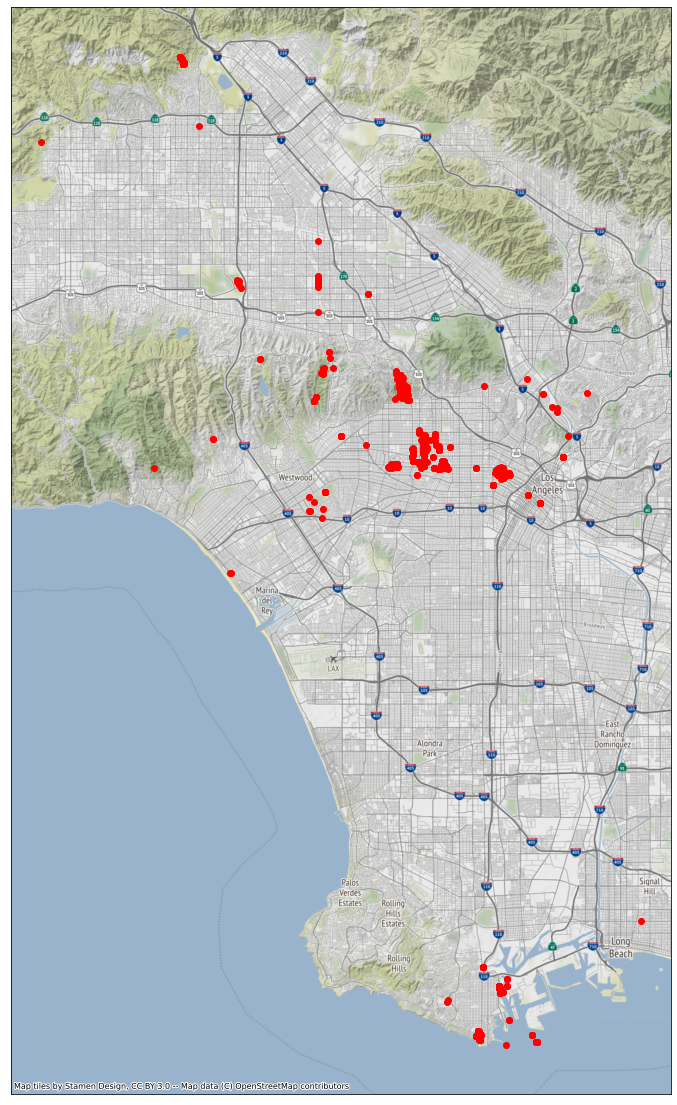

In [75]:
# Tags on map
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
parksgdf.to_crs('EPSG:3857').plot(color='r', ax=ax) # remember, 3857 is Web Mercator

# let's add a basemap using the contextily library
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])